In [11]:
import sys
import cv2 as cv
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def func1():
    radius_arr = []
    lenght = [15,30,45,60,75,90,105,120,135,150]
    low_apple_red = (4.6, 218.79, 211.905)
    high_apple_red = (3.95, 181, 171.12)
    low_apple_raw = (0.0, 150.0, 150.0)
    high_apple_raw = (15.0, 255.0, 255.0)

    x_position  = np.array([])
    y_position  = np.array([])
    radius_array= np.array([])
    radius_arr = []

    for index,value in enumerate(lenght):
        filename = f'/home/viggo/Desktop/10. semester/31386_dependable_robots/vision_python/{value}.png'

        # Loads an image
        src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_COLOR)
        # Check if image is loaded fine
        
        image_hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)
        mask_red = cv.inRange(image_hsv,low_apple_red, high_apple_red)
        mask_raw = cv.inRange(image_hsv,low_apple_raw, high_apple_raw)

        mask = mask_red + mask_raw

        cnts,_ = cv.findContours(mask.copy(), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
        c_num=0

        for i,c in enumerate(cnts):
            # draw a circle enclosing the object
            ((x, y), r) = cv.minEnclosingCircle(c)
            if r>5:
                c_num+=1
                cv.circle(src, (int(x), int(y)), int(r), (0, 255, 0), 2)
                cv.putText(src, "#{}".format(c_num), (int(x) - 10, int(y)), 
                    cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
                print(r)
                radius_arr.append(r)
            else:
                continue
        # np.append(x,x_position)
        # np.append(y,y_position)
        
        cv.imshow('Frame',src)
        cv.waitKey(0)
    cv.destroyAllWindows()
    return radius_arr,lenght

def func2(lenght,radius_array):
    A = np.vstack([np.ones(len(lenght)), lenght]).T
    print(A)
    print(radius_array)

    radius_arr = np.array(radius_array)
    radius_arr = radius_arr[:, np.newaxis]
    print(radius_arr)

    alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), radius_arr)
    print(alpha)

    # plt.figure(figsize = (10,8))
    plt.plot(lenght, radius_arr, 'b.')
    plt.plot(lenght, alpha[1]*lenght + alpha[0], 'r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

84.48686218261719
42.885799407958984
28.52952003479004
22.011646270751953
17.42092514038086
14.54518985748291
12.534539222717285
10.7928466796875
9.617792129516602
8.544321060180664
[[  1.  15.]
 [  1.  30.]
 [  1.  45.]
 [  1.  60.]
 [  1.  75.]
 [  1.  90.]
 [  1. 105.]
 [  1. 120.]
 [  1. 135.]
 [  1. 150.]]
[84.48686218261719, 42.885799407958984, 28.52952003479004, 22.011646270751953, 17.42092514038086, 14.54518985748291, 12.534539222717285, 10.7928466796875, 9.617792129516602, 8.544321060180664]
[[84.48686218]
 [42.88579941]
 [28.52952003]
 [22.01164627]
 [17.42092514]
 [14.54518986]
 [12.53453922]
 [10.79284668]
 [ 9.61779213]
 [ 8.54432106]]
[[59.68192234]
 [-0.41872701]]


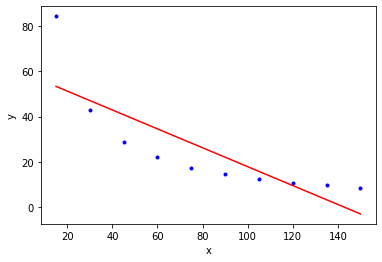

In [12]:
radius,length = func1()
func2(length,radius)